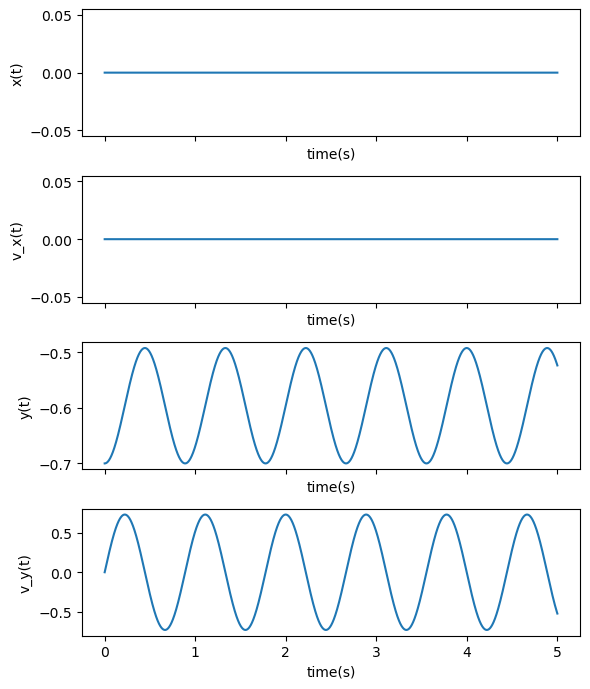

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assigning the variables:
m = 0.2  # kg
k = 10   # N/m
l_0 = 0.4  # m
g = 9.81  # gravitational constant

def RK(t_0, t_end, h, *init_cond):
    # Time array
    time_arr = np.arange(t_0, t_end + h, h)
    y_arr = np.zeros((len(init_cond), time_arr.size))
    
    # Setting initial conditions
    y_arr[:, 0] = init_cond
    
    # ODE Function
    def f(t, y):
        r = np.sqrt(y[0]**2 + y[2]**2)
        return np.array([y[1],
                         -k/m * y[0] * (r - l_0) / r,
                         y[3],
                         -g - k/m * y[2] * (r - l_0) / r])
    
    # Runge-Kutta method
    for i, t in enumerate(time_arr[:-1]):
        y = y_arr[:, i]
        
        # k values
        k1 = f(t, y)
        k2 = f(t + 0.5*h, y + 0.5*h*k1)
        k3 = f(t + 0.5*h, y + 0.5*h*k2)
        k4 = f(t + h, y + h * k3)
    
        # Update y
        y_arr[:, i+1] = y + h*(k1 + 2*k2 + 2*k3 + k4)/6.0
    
    return y_arr, time_arr
    
init_conditions = (0, 0, -0.7, 0)

y_array, time_array = RK(0, 5, 0.001, *(0,0,-0.7,0))

# Plotting the solution:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(6, 7))

ax[0].plot(time_array, y_array[0])
ax[0].set_xlabel("time(s)")
ax[0].set_ylabel("x(t)")

ax[1].plot(time_array, y_array[1])
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("v_x(t)")

ax[2].plot(time_array, y_array[2])
ax[2].set_xlabel("time(s)")
ax[2].set_ylabel("y(t)")

ax[3].plot(time_array, y_array[3])
ax[3].set_xlabel("time(s)")
ax[3].set_ylabel("v_y(t)")

plt.tight_layout()
plt.show()


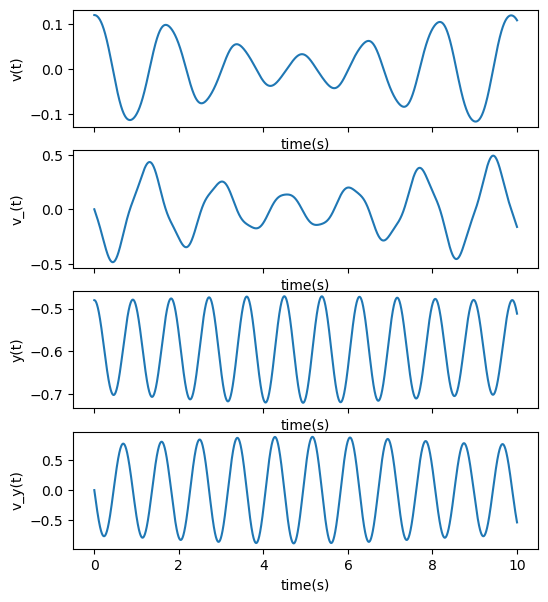

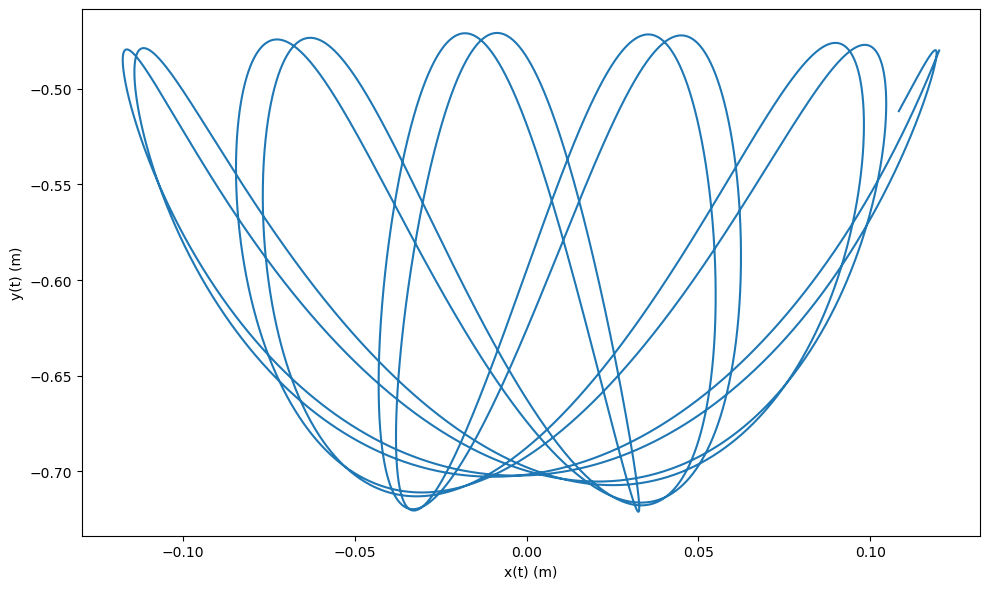

In [16]:
init_conditions = (-0.12, 0, -0.48, 0)

y_array, time_array = RK(0, 10, 0.001, *(0.12, 0, -0.48, 0))

# Plotting the solution:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(6, 7))

ax[0].plot(time_array, y_array[0], label="x(t)")
ax[0].set_xlabel("time(s)")
ax[0].set_ylabel("v(t)")

ax[1].plot(time_array, y_array[1], label="vx(t)")
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("v_(t)")

ax[2].plot(time_array, y_array[2], label="y(t)")
ax[2].set_xlabel("time(s)")
ax[2].set_ylabel("y(t)")

ax[3].plot(time_array, y_array[3], label="vy(t)")
ax[3].set_xlabel("time(s)")
ax[3].set_ylabel("v_y(t)")

# ploting y(t) as a function of x(t)
plt.subplots(figsize = (10,6))

plt.plot(y_array[0], y_array[2])
plt.xlabel('x(t) (m)')
plt.ylabel('y(t) (m)')

plt.savefig("tut_7_p2_xy(mkfman002)")
plt.tight_layout()
plt.show()


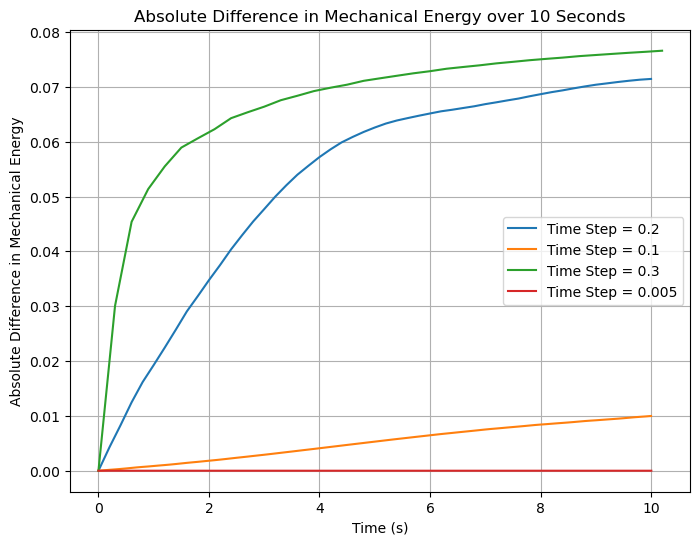

In [12]:
# Calculate mechanical energy
def mechanical_energy(y_arr):
    r = np.sqrt(y_arr[0]**2 + y_arr[2]**2)
    kinetic_energy = 0.5 * m * (y_arr[1]**2 + y_arr[3]**2)
    gravitational_potential = m * g * y_arr[2]
    spring_potential = 0.5 * k * (r - l_0)**2
    total_energy = kinetic_energy + gravitational_potential + spring_potential
    return total_energy

# Define time-step values
time_steps = [0.2, 0.1, 0.3, 0.005]

# Initial conditions
init_conditions = (-0.12, 0, -0.48, 0)

# Calculate initial mechanical energy
y_array_init, _ = RK(0, 10, 0.001, *init_conditions)
initial_energy = mechanical_energy(y_array_init[:, 0])

# Plotting the energy change for each time step
plt.figure(figsize=(8, 6))

for h in time_steps:
    y_array, time_array = RK(0, 10, h, *init_conditions)
    energy_difference = np.abs(initial_energy - mechanical_energy(y_array))
    plt.plot(time_array, energy_difference, label=f"Time Step = {h}")

plt.xlabel("Time (s)")
plt.ylabel("Absolute Difference in Mechanical Energy")
plt.title("Absolute Difference in Mechanical Energy over 10 Seconds")
plt.legend()
plt.grid(True)
plt.show()
